# Project 03 - Iron Kaggle

Predicting sales from past data

## Reading data

In [3]:
# Import the libraries
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')
import os

import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
%run '/Users/leozinho.air/Desktop/Ironhack/Project 03 - Iron Kaggle/eda_functions.py'

In [5]:
# Read the past data
df = pd.read_excel('/Users/leozinho.air/Desktop/Ironhack/Project 03 - Iron Kaggle/Past_Data.xlsx')
df


,Index,Store_ID,Day_of_week,Date,Nb_customers_on_day,Open,Promotion,State_holiday,School_holiday,Sales
0,511306,52,2,2013-01-01,0,0,0,a,1,0
1,150763,677,2,2013-01-01,0,0,0,a,1,0
2,633749,348,2,2013-01-01,0,0,0,a,1,0
3,106460,966,2,2013-01-01,0,0,0,a,1,0
4,278363,750,2,2013-01-01,0,0,0,a,1,0
...,...,...,...,...,...,...,...,...,...,...
570549,162217,126,3,2015-04-22,416,1,0,0,0,3856
570550,373333,715,3,2015-04-22,613,1,0,0,0,5154
570551,586351,93,3,2015-04-22,553,1,0,0,0,4923
570552,672462,845,3,2015-04-22,302,1,0,0,0,3974


In [6]:
# Read the future data
df_future = pd.read_excel('/Users/leozinho.air/Desktop/Ironhack/Project 03 - Iron Kaggle/Future_data_without_label.xlsx')

In [7]:
# Analyze past data

standard_head(df)
analyze_data(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570554 entries, 0 to 570553
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   index                570554 non-null  int64         
 1   store_id             570554 non-null  int64         
 2   day_of_week          570554 non-null  int64         
 3   date                 570554 non-null  datetime64[ns]
 4   nb_customers_on_day  570554 non-null  int64         
 5   open                 570554 non-null  int64         
 6   promotion            570554 non-null  int64         
 7   state_holiday        570554 non-null  object        
 8   school_holiday       570554 non-null  int64         
 9   sales                570554 non-null  int64         
dtypes: datetime64[ns](1), int64(8), object(1)
memory usage: 43.5+ MB
Amount of null values: 0


Null values:
 index                  0
store_id               0
day_of_week            0
date   

index                           int64
store_id                        int64
day_of_week                     int64
date                   datetime64[ns]
nb_customers_on_day             int64
open                            int64
promotion                       int64
state_holiday                  object
school_holiday                  int64
sales                           int64
dtype: object

,index,store_id,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales
0,511306,52,2,2013-01-01,0,0,0,a,1,0
1,150763,677,2,2013-01-01,0,0,0,a,1,0
2,633749,348,2,2013-01-01,0,0,0,a,1,0
3,106460,966,2,2013-01-01,0,0,0,a,1,0
4,278363,750,2,2013-01-01,0,0,0,a,1,0
...,...,...,...,...,...,...,...,...,...,...
570549,162217,126,3,2015-04-22,416,1,0,0,0,3856
570550,373333,715,3,2015-04-22,613,1,0,0,0,5154
570551,586351,93,3,2015-04-22,553,1,0,0,0,4923
570552,672462,845,3,2015-04-22,302,1,0,0,0,3974


Unique values for index:
[511306 150763 633749 ... 586351 672462 514220]

Unique values for store_id:
[  52  677  348 ... 1103  102  345]

Unique values for day_of_week:
[2 3 4 5 6 7 1]

Unique values for date:
['2013-01-01T00:00:00.000000000' '2013-01-02T00:00:00.000000000'
 '2013-01-03T00:00:00.000000000' '2013-01-04T00:00:00.000000000'
 '2013-01-05T00:00:00.000000000' '2013-01-06T00:00:00.000000000'
 '2013-01-07T00:00:00.000000000' '2013-01-08T00:00:00.000000000'
 '2013-01-09T00:00:00.000000000' '2013-01-10T00:00:00.000000000'
 '2013-01-11T00:00:00.000000000' '2013-01-12T00:00:00.000000000'
 '2013-01-13T00:00:00.000000000' '2013-01-14T00:00:00.000000000'
 '2013-01-15T00:00:00.000000000' '2013-01-16T00:00:00.000000000'
 '2013-01-17T00:00:00.000000000' '2013-01-18T00:00:00.000000000'
 '2013-01-19T00:00:00.000000000' '2013-01-20T00:00:00.000000000'
 '2013-01-21T00:00:00.000000000' '2013-01-22T00:00:00.000000000'
 '2013-01-23T00:00:00.000000000' '2013-01-24T00:00:00.000000000'
 '2013-01

In [8]:
# Analyze future data

standard_head(df_future)
analyze_data(df_future)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70286 entries, 0 to 70285
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   index                70286 non-null  int64         
 1   store_id             70286 non-null  int64         
 2   day_of_week          70286 non-null  int64         
 3   date                 70286 non-null  datetime64[ns]
 4   nb_customers_on_day  70286 non-null  int64         
 5   open                 70286 non-null  int64         
 6   promotion            70286 non-null  int64         
 7   state_holiday        70286 non-null  object        
 8   school_holiday       70286 non-null  int64         
dtypes: datetime64[ns](1), int64(7), object(1)
memory usage: 4.8+ MB
Amount of null values: 0


Null values:
 index                  0
store_id               0
day_of_week            0
date                   0
nb_customers_on_day    0
open                   0
promo

index                           int64
store_id                        int64
day_of_week                     int64
date                   datetime64[ns]
nb_customers_on_day             int64
open                            int64
promotion                       int64
state_holiday                  object
school_holiday                  int64
dtype: object

,index,store_id,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday
0,617699,761,3,2015-04-22,955,1,0,0,0
1,522235,238,3,2015-04-22,1025,1,0,0,0
2,321177,198,3,2015-04-22,203,1,0,0,0
3,395430,606,3,2015-04-22,585,1,0,0,0
4,488260,382,3,2015-04-22,555,1,0,0,0
...,...,...,...,...,...,...,...,...,...
70281,369531,58,5,2015-07-31,603,1,1,0,0
70282,161452,241,5,2015-07-31,763,1,1,0,1
70283,242869,293,5,2015-07-31,878,1,1,0,1
70284,480480,14,5,2015-07-31,710,1,1,0,1


Unique values for index:
[617699 522235 321177 ... 242869 480480 344966]

Unique values for store_id:
[761 238 198 ... 488 456  14]

Unique values for day_of_week:
[3 4 5 6 7 1 2]

Unique values for date:
['2015-04-22T00:00:00.000000000' '2015-04-23T00:00:00.000000000'
 '2015-04-24T00:00:00.000000000' '2015-04-25T00:00:00.000000000'
 '2015-04-26T00:00:00.000000000' '2015-04-27T00:00:00.000000000'
 '2015-04-28T00:00:00.000000000' '2015-04-29T00:00:00.000000000'
 '2015-04-30T00:00:00.000000000' '2015-05-01T00:00:00.000000000'
 '2015-05-02T00:00:00.000000000' '2015-05-03T00:00:00.000000000'
 '2015-05-04T00:00:00.000000000' '2015-05-05T00:00:00.000000000'
 '2015-05-06T00:00:00.000000000' '2015-05-07T00:00:00.000000000'
 '2015-05-08T00:00:00.000000000' '2015-05-09T00:00:00.000000000'
 '2015-05-10T00:00:00.000000000' '2015-05-11T00:00:00.000000000'
 '2015-05-12T00:00:00.000000000' '2015-05-13T00:00:00.000000000'
 '2015-05-14T00:00:00.000000000' '2015-05-15T00:00:00.000000000'
 '2015-05-16T00

## Cleaning operations

In [9]:
# Create date columns on past data

df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year
df['week'] = df['date'].dt.week
df['day'] = df['date'].dt.day

print("Past data types:\n", df.dtypes)

print("--------------------------")

df_future['month'] = df_future['date'].dt.month
df_future['year'] = df_future['date'].dt.year
df_future['week'] = df_future['date'].dt.week
df_future['day'] = df_future['date'].dt.day

print("Past data types:\n", df_future.dtypes)


Past data types:
 index                           int64
store_id                        int64
day_of_week                     int64
date                   datetime64[ns]
nb_customers_on_day             int64
open                            int64
promotion                       int64
state_holiday                  object
school_holiday                  int64
sales                           int64
month                           int64
year                            int64
week                            int64
day                             int64
dtype: object
--------------------------
Past data types:
 index                           int64
store_id                        int64
day_of_week                     int64
date                   datetime64[ns]
nb_customers_on_day             int64
open                            int64
promotion                       int64
state_holiday                  object
school_holiday                  int64
month                           int64
year       

## EDA

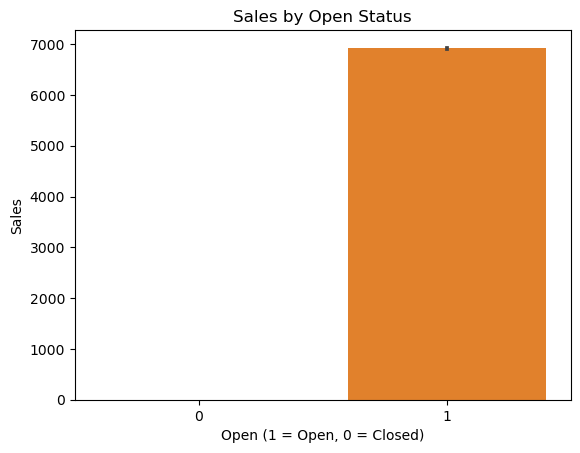

In [10]:
# Visualizing sales data based on the open status of stores

# This plot helps in understanding if there are any sales when the stores are closed
sns.barplot(data=df, x='open', y='sales')

# Adding title and labels to the plot for better interpretation
plt.title('Sales by Open Status')
plt.xlabel('Open (1 = Open, 0 = Closed)')
plt.ylabel('Sales')

# Display the plot
plt.show()

In [11]:
# Checking if there are any sales recorded when the stores are closed and there are no customers present

# Filtering the DataFrame to find instances where the store is closed (open = 0) but sales are recorded
closed_store_sales = df[(df["open"] == 0) & (df["sales"] != 0)]
print("Sales recorded when the stores are closed:", len(closed_store_sales))  # Output: 0 (empty DataFrame)

# Filtering the DataFrame to find instances where there are no customers but sales are recorded
no_customers_sales = df[(df["nb_customers_on_day"] == 0) & (df["sales"] != 0)]
print("Sales recorded when there are no customers:", len(no_customers_sales))  # Output: 0 (empty DataFrame)

# Conclusion: There are no sales recorded when the stores are closed and when there are no customers.



Sales recorded when the stores are closed: 0
Sales recorded when there are no customers: 0


In [12]:
# Filtering the DataFrame to include only rows where sales are not equal to zero,
# as the model will be built solely based on instances where sales are recorded

# Update past data:
# Filtering out rows where the store is closed (open = 0) or there are no customers,
# and dropping the 'index' and 'open' columns, then resetting the index
df = df[(df["open"] != 0) & (df["nb_customers_on_day"] != 0)]
df = df.drop(["index", "open"], axis=1).reset_index(drop=True)
print("Updated past data:")
display(df)

# Update future data:
# Filtering out rows where the store is closed (open = 0) or there are no customers,
# and dropping the 'index' and 'open' columns, then resetting the index
df_future = df_future[(df_future["open"] != 0) & (df_future["nb_customers_on_day"] != 0)]
df_future = df_future.drop(["index", "open"], axis=1).reset_index(drop=True)
print("Updated future data:")
display(df_future)


Updated past data:


,store_id,day_of_week,date,nb_customers_on_day,promotion,state_holiday,school_holiday,sales,month,year,week,day
0,676,2,2013-01-01,777,0,a,1,3821,1,2013,1,1
1,274,2,2013-01-01,729,0,a,1,3102,1,2013,1,1
2,423,2,2013-01-01,1751,0,a,1,9643,1,2013,1,1
3,259,2,2013-01-01,1444,0,a,1,6851,1,2013,1,1
4,769,2,2013-01-01,1248,0,a,1,5035,1,2013,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
473775,126,3,2015-04-22,416,0,0,0,3856,4,2015,17,22
473776,715,3,2015-04-22,613,0,0,0,5154,4,2015,17,22
473777,93,3,2015-04-22,553,0,0,0,4923,4,2015,17,22
473778,845,3,2015-04-22,302,0,0,0,3974,4,2015,17,22


Updated future data:


,store_id,day_of_week,date,nb_customers_on_day,promotion,state_holiday,school_holiday,month,year,week,day
0,761,3,2015-04-22,955,0,0,0,4,2015,17,22
1,238,3,2015-04-22,1025,0,0,0,4,2015,17,22
2,198,3,2015-04-22,203,0,0,0,4,2015,17,22
3,606,3,2015-04-22,585,0,0,0,4,2015,17,22
4,382,3,2015-04-22,555,0,0,0,4,2015,17,22
...,...,...,...,...,...,...,...,...,...,...,...
58141,58,5,2015-07-31,603,1,0,0,7,2015,31,31
58142,241,5,2015-07-31,763,1,0,1,7,2015,31,31
58143,293,5,2015-07-31,878,1,0,1,7,2015,31,31
58144,14,5,2015-07-31,710,1,0,1,7,2015,31,31


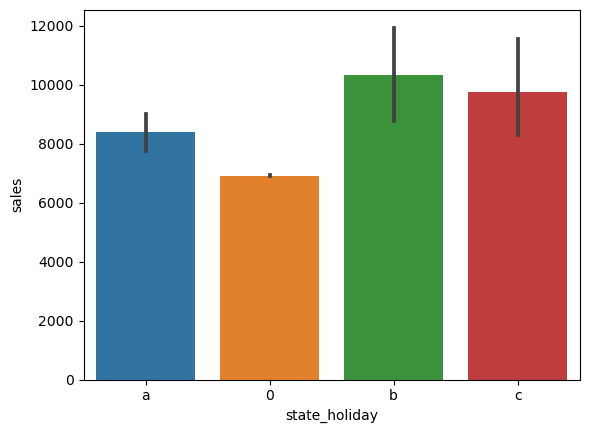

In [13]:
# Analysis of 'State holiday' effect on sales

# Convert all entries in the 'state_holiday' column to strings to handle mixed types effectively
df['state_holiday'] = df['state_holiday'].astype(str)

# Plotting the mean sales for each state holiday category
sns.barplot(x=df["state_holiday"], y=df["sales"], data=df, estimator="mean")
plt.show()

# There is no significative difference


In [14]:
# Encoding 'state holiday' column

# Counting occurrences of each state holiday category in the past data
print("Number of occurrences of state holiday 'a':", len(df[df["state_holiday"] == "a"]))  # Output: 326
print("Number of occurrences of state holiday 'b':", len(df[df["state_holiday"] == "b"]))  # Output: 104
print("Number of occurrences of state holiday 'c':", len(df[df["state_holiday"] == "c"]))  # Output: 52

# Check if any occurrence of state holiday 'b' or 'c' in future data and raise an error
if len(df_future[df_future["state_holiday"].isin(["b", "c"])]) > 0:
    raise ValueError("Future data contains state holidays 'b' or 'c', which is unexpected.")
else:
    # Count occurrences of state holiday 'a' in future data
    print("Number of occurrences of state holiday 'a' in future data:", len(df_future[df_future["state_holiday"] == "a"]))


# Binary encoding of state holiday column:

# For past data:
# Convert non-'0' state holidays to 1, representing presence of a state holiday, and '0' otherwise
df['state_holiday'] = np.where(df['state_holiday'] != '0', 1, 0)

# For future data:
# Convert state holiday entries to strings, then perform the binary encoding
df_future['state_holiday'] = df_future['state_holiday'].astype(str)
df_future['state_holiday'] = np.where(df_future['state_holiday'] != '0', 1, 0)


Number of occurrences of state holiday 'a': 326
Number of occurrences of state holiday 'b': 104
Number of occurrences of state holiday 'c': 52
Number of occurrences of state holiday 'a' in future data: 115


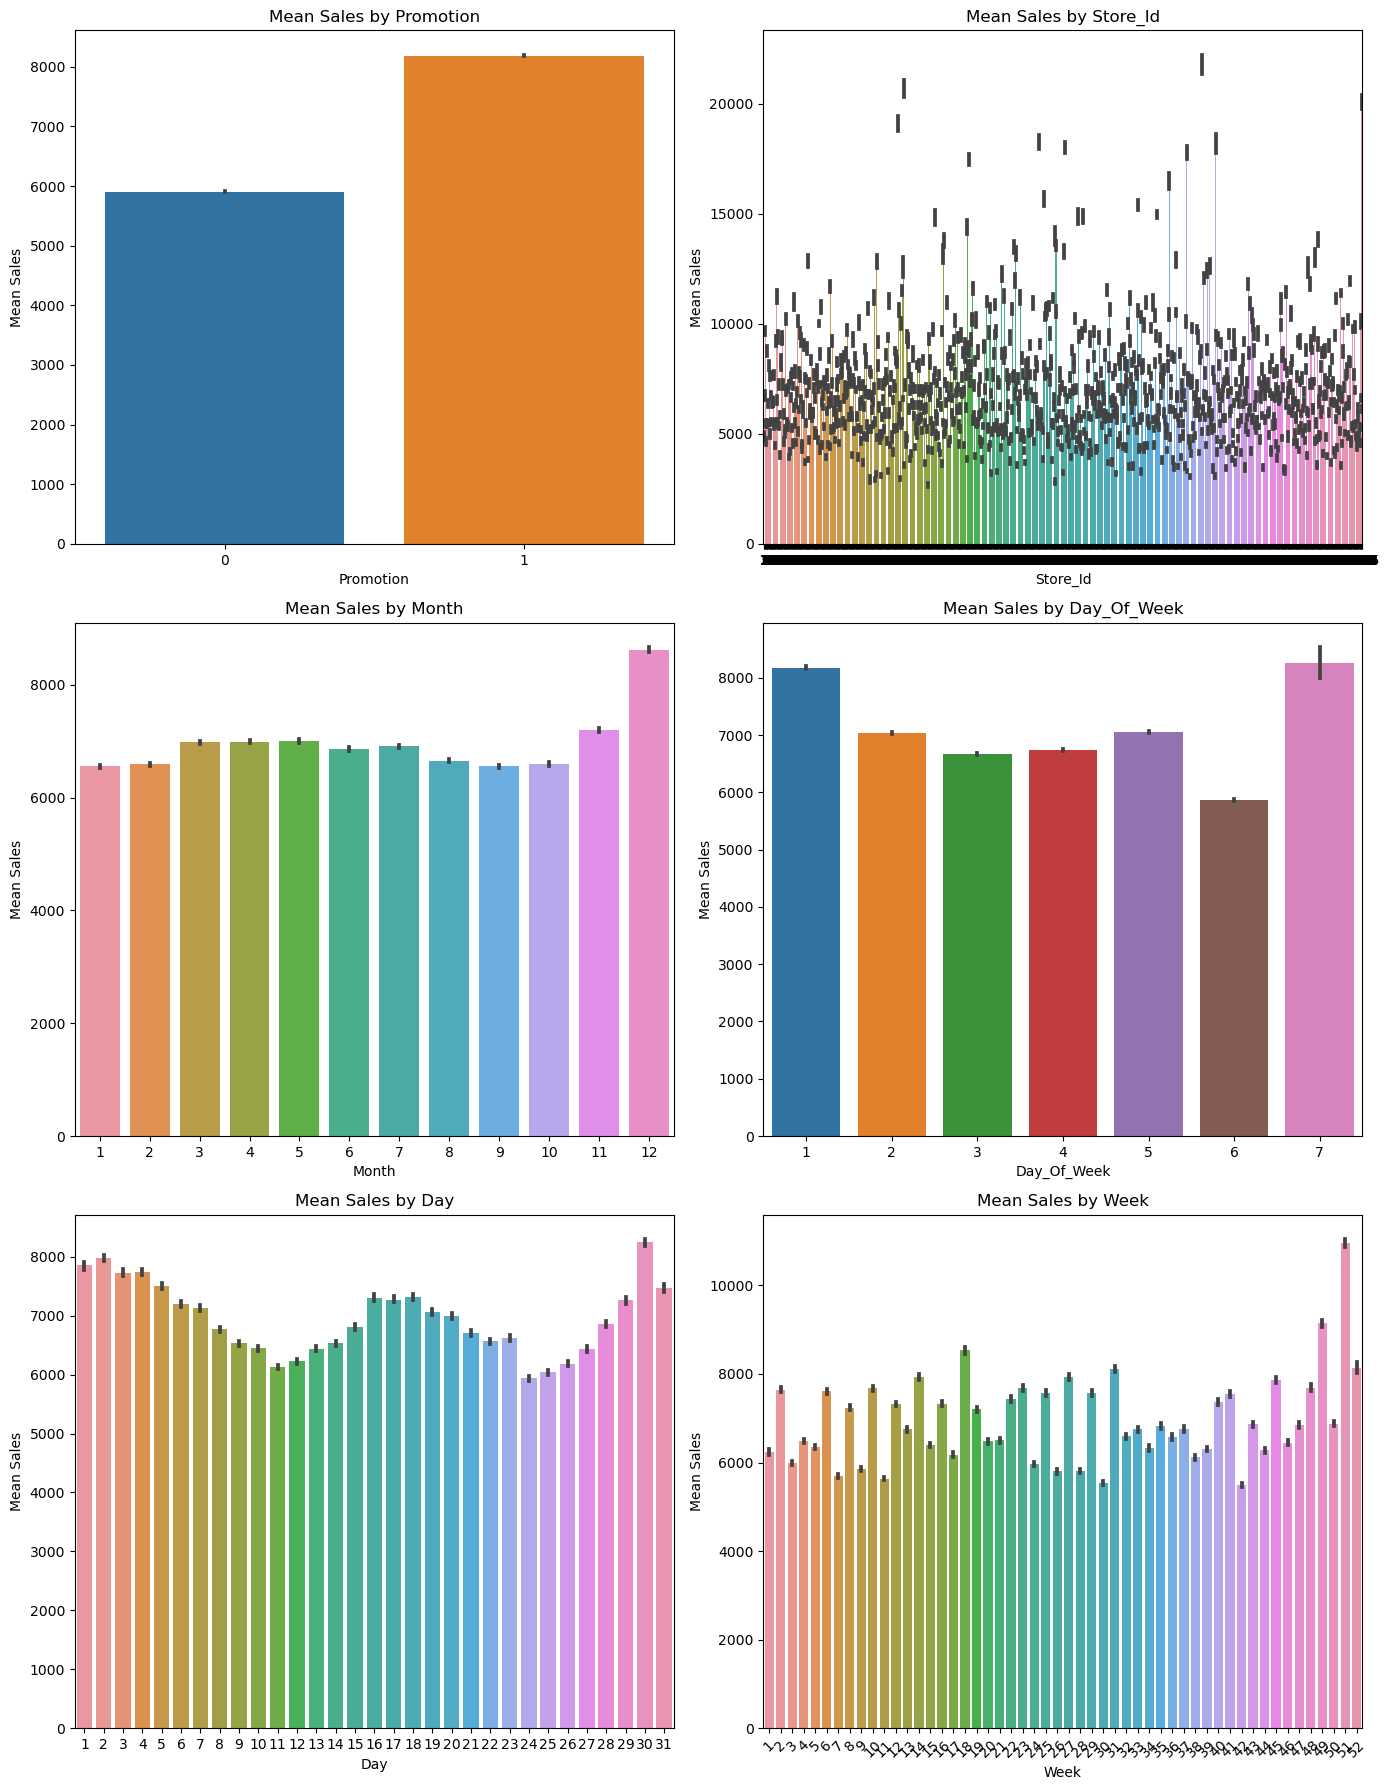

In [15]:
# Displaying feature correlation with 'sales'

# List of columns to plot against 'sales'
cols_to_plot = ['promotion', 'store_id', 'month', 'day_of_week', 'day','week']

nrows = 3
ncols = 2
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14, 18))

axes = axes.flatten()

for i, column in enumerate(cols_to_plot):
    # Plot on the ith subplot
    sns.barplot(x=column, y="sales", data=df, estimator='mean', ax=axes[i])
    axes[i].set_title(f'Mean Sales by {column.title()}')
    axes[i].set_xlabel(column.title())
    axes[i].set_ylabel('Mean Sales')
    plt.xticks(rotation=45)

plt.tight_layout()

for j in range(i + 1, nrows * ncols):
    fig.delaxes(axes[j])

plt.show()


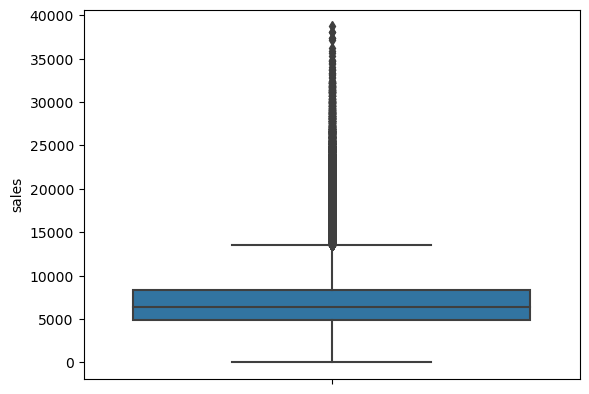

Number of identified outliers: 20098


In [16]:
# Outliers analysis

# Visualizing the distribution of 'sales' using a boxplot
sns.boxplot(y=df['sales'])
plt.show()

# Outliers identification based on the average pattern
mean = df['sales'].mean()  # Calculate the mean of 'sales'
std_dev = df['sales'].std()  # Calculate the standard deviation of 'sales'
lower_bound = mean - 2 * std_dev  # Calculate the lower bound for outliers
upper_bound = mean + 2 * std_dev  # Calculate the upper bound for outliers

# Identify outliers based on the lower and upper bounds
outliers = df[(df['sales'] < lower_bound) | (df['sales'] > upper_bound)]

# Count the number of identified outliers
num_outliers = len(outliers)

# Print the number of identified outliers
print("Number of identified outliers:", num_outliers)

# Note: The decision to keep or remove outliers depends on the specific analysis goals
# and the context of the data. In this case, the decision to keep outliers is made,
# but further analysis should consider the impact of these outliers on the results.


,store_id,day_of_week,nb_customers_on_day,promotion,state_holiday,school_holiday,sales,month,year,week,day
store_id,1.000000,0.000847,0.034090,0.000626,0.002653,-0.000612,0.008510,0.001298,0.000262,0.000993,-0.001721
day_of_week,0.000847,1.000000,-0.094963,-0.284679,-0.002492,-0.143087,-0.173894,-0.020340,-0.000029,-0.012799,0.003962
nb_customers_on_day,0.034090,-0.094963,1.000000,0.182326,0.052128,0.026018,0.827806,0.060004,-0.001283,0.059981,-0.037004
promotion,0.000626,-0.284679,0.182326,1.000000,-0.000148,0.019190,0.365028,-0.006809,0.022038,0.007393,-0.136091
state_holiday,0.002653,-0.002492,0.052128,-0.000148,1.000000,0.020828,0.020997,0.003055,-0.001883,0.003523,-0.002734
school_holiday,-0.000612,-0.143087,0.026018,0.019190,0.020828,1.000000,0.038915,0.113349,-0.039987,0.069896,0.022487
sales,0.008510,-0.173894,0.827806,0.365028,0.020997,0.038915,1.000000,0.080876,0.023521,0.081109,-0.058800
month,0.001298,-0.020340,0.060004,-0.006809,0.003055,0.113349,0.080876,1.000000,-0.319340,0.960761,0.000055
year,0.000262,-0.000029,-0.001283,0.022038,-0.001883,-0.039987,0.023521,-0.319340,1.000000,-0.310551,-0.014350
week,0.000993,-0.012799,0.059981,0.007393,0.003523,0.069896,0.081109,0.960761,-0.310551,1.000000,0.042441


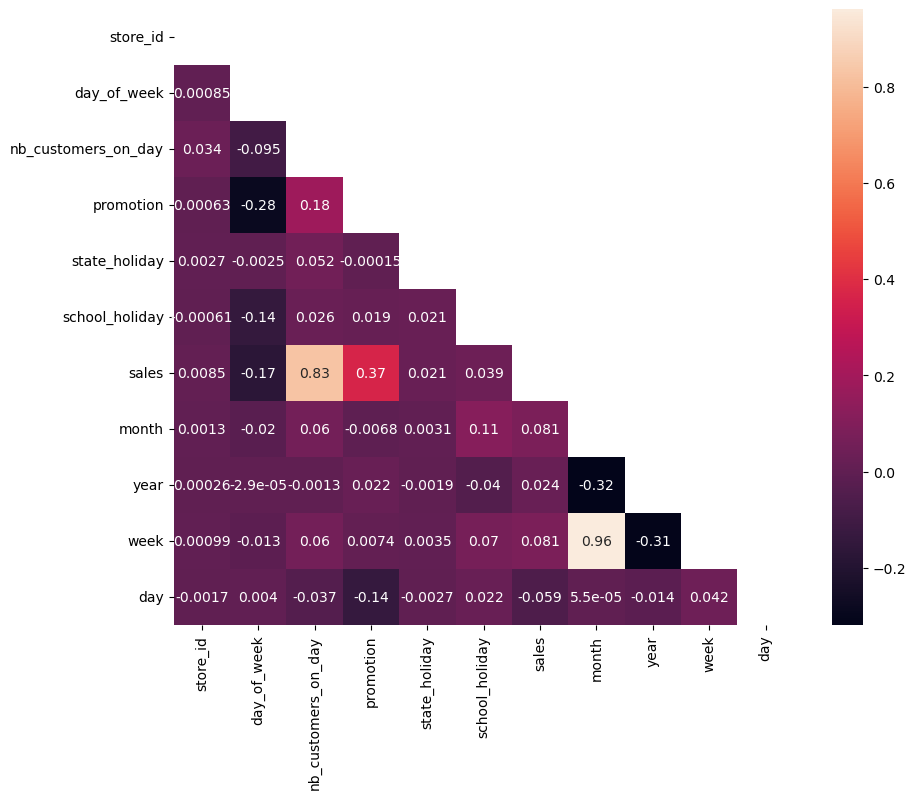

In [17]:
# Correlations matrix

# Calculate the correlations matrix
correlations_matrix = df.corr()

# Display the correlations matrix
display(correlations_matrix)

# Plot the correlations matrix using a heatmap
# Create a mask to hide the upper triangle of the heatmap (redundant information)
mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True

# Create the heatmap plot
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)

# Show the plot
plt.show()

# Note: The 'nb_customers_on_day' feature has the highest correlation (0.83) with our target variable.


count    473780.000000
mean        763.244711
std         401.770146
min           5.000000
25%         518.000000
50%         676.000000
75%         894.000000
max        5494.000000
Name: nb_customers_on_day, dtype: float64

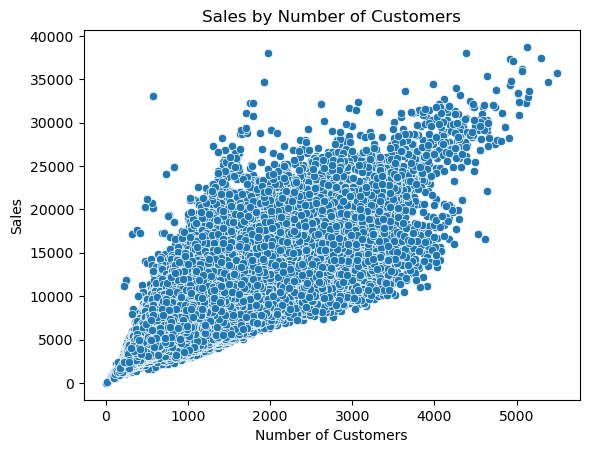

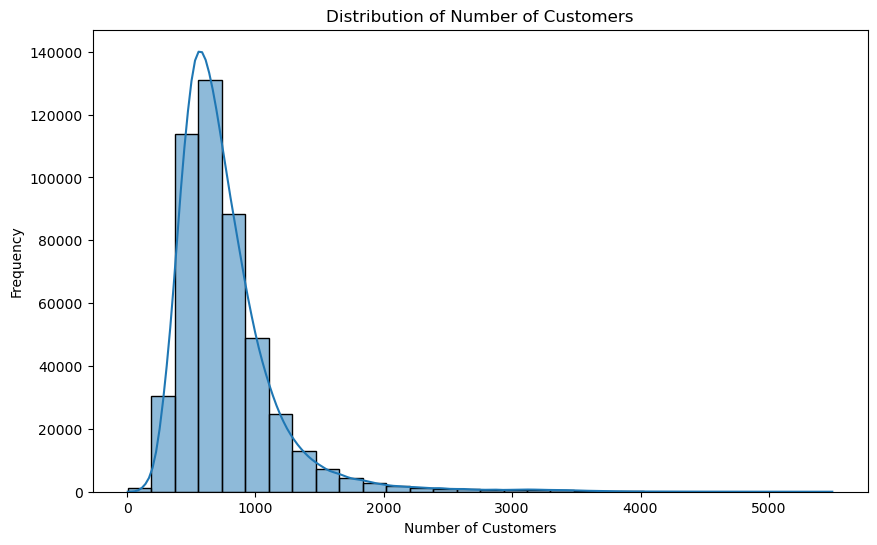

In [18]:
# Analyze 'nb_customers_on_day' feature

# Display descriptive statistics of the 'nb_customers_on_day' feature
display(df['nb_customers_on_day'].describe())

# Scatter plot to visualize the relationship between 'nb_customers_on_day' and 'sales'
sns.scatterplot(data=df, x='nb_customers_on_day', y='sales')
plt.title('Sales by Number of Customers')
plt.xlabel('Number of Customers')
plt.ylabel('Sales')
plt.show()

# Plot a histogram to visualize the distribution of 'nb_customers_on_day'
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='nb_customers_on_day', bins=30, kde=True)
plt.title('Distribution of Number of Customers')
plt.xlabel('Number of Customers')
plt.ylabel('Frequency')
plt.show()


In [19]:
# Display column names of the past data
print("Columns in past data:")
print(df.columns)

# Display column names of the future data
print("\nColumns in future data:")
print(df_future.columns)


Columns in past data:
Index(['store_id', 'day_of_week', 'date', 'nb_customers_on_day', 'promotion',
       'state_holiday', 'school_holiday', 'sales', 'month', 'year', 'week',
       'day'],
      dtype='object')

Columns in future data:
Index(['store_id', 'day_of_week', 'date', 'nb_customers_on_day', 'promotion',
       'state_holiday', 'school_holiday', 'month', 'year', 'week', 'day'],
      dtype='object')


## Machine Learning

In [20]:
# X - y split

X = df.drop(['sales','date'], axis = 1)

y = df['sales']


# Train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)



In [21]:
# Train data frame
df_train = pd.concat([X_train, y_train], axis = 1)
df_train

,store_id,day_of_week,nb_customers_on_day,promotion,state_holiday,school_holiday,month,year,week,day,sales
75233,8,6,320,0,0,0,5,2013,19,11,2552
277293,91,6,815,0,0,0,4,2014,16,19,7273
219448,304,1,1054,0,0,0,1,2014,3,13,6054
258163,814,2,762,1,0,0,3,2014,12,18,9339
437332,164,4,630,1,0,1,2,2015,8,19,6508
...,...,...,...,...,...,...,...,...,...,...,...
259178,708,4,426,1,0,0,3,2014,12,20,4068
365838,77,1,905,1,0,0,10,2014,41,6,11485
131932,950,4,562,1,0,1,8,2013,33,15,5861
146867,203,1,925,1,0,0,9,2013,37,9,7990


In [22]:
# Test data frame
df_test = pd.concat([X_test, y_test], axis = 1)
df_test

,store_id,day_of_week,nb_customers_on_day,promotion,state_holiday,school_holiday,month,year,week,day,sales
155155,335,1,2937,1,0,0,9,2013,39,23,20292
219336,477,1,413,0,0,0,1,2014,3,13,5072
69320,600,1,732,1,0,0,4,2013,18,29,9552
267644,689,4,774,1,0,0,4,2014,14,3,8471
451124,302,6,395,0,0,0,3,2015,11,14,4548
...,...,...,...,...,...,...,...,...,...,...,...
298100,1,2,511,0,0,0,5,2014,22,27,3971
353164,732,2,787,0,0,0,9,2014,37,9,6494
393626,1066,6,1250,0,0,0,11,2014,48,29,12979
102935,287,5,758,0,0,0,6,2013,26,28,7078


In [23]:
# Re-defining X_train, X_test, y_train, y_test
X_train = df_train.drop(["sales"], axis = 1)
X_test = df_test.drop(["sales"], axis = 1)
y_train = df_train["sales"]
y_test = df_test["sales"]

### Linear Regression

Mean Squared Error (MSE): 2530139.1876719897
Mean Absolute Error (MAE): 1140.192796419297
R-squared (R2): 0.7378582514479676
Root Mean Squared Error (RMSE): 1590.64


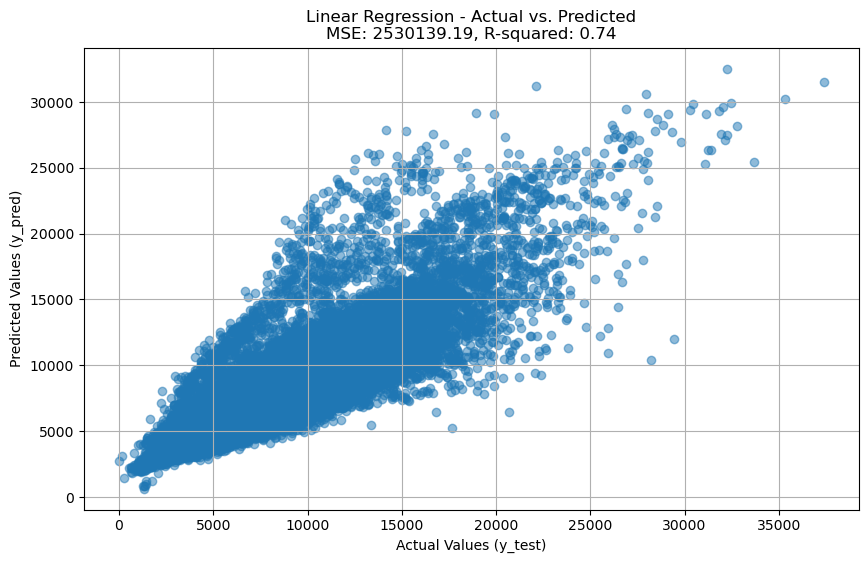

In [24]:
# Linear regression model
from sklearn.linear_model import LinearRegression
from sklearn import linear_model


# Create a linear regression model
model = LinearRegression()

# Fit the model on training data
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluation metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")


# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# R-squared (Coefficient of Determination)
r_squared = r2_score(y_test, y_pred)
print(f"R-squared (R2): {r_squared}")

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Create a scatter plot of actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values (y_pred)")
plt.title(f"Linear Regression - Actual vs. Predicted\nMSE: {mse:.2f}, R-squared: {r_squared:.2f}")
plt.grid(True)
plt.show()

In [25]:
# OLS
import statsmodels.api as sm

# Add a constant
X = sm.add_constant(X)

# Create and fit the OLS model
model = sm.OLS(y, X).fit()

# Print the summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                 1.328e+05
Date:                Wed, 21 Feb 2024   Prob (F-statistic):               0.00
Time:                        18:09:33   Log-Likelihood:            -4.1652e+06
No. Observations:              473780   AIC:                         8.330e+06
Df Residuals:                  473769   BIC:                         8.331e+06
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -3.051e+05   7

### Decision Tree

In [26]:
# Decision Tree
from sklearn.tree import DecisionTreeRegressor

# Create a Decision Tree Regressor
decision_tree_regressor = DecisionTreeRegressor(max_depth = 45, max_features = 1.0, min_samples_leaf = 4,
                                                min_samples_split = 25, random_state=42) # those are the best parameters

# Train the model with the training data
decision_tree_regressor.fit(X_train, y_train)

# Make predictions using the test data
y_pred = decision_tree_regressor.predict(X_test)


# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
mae = mean_absolute_error(y_test, y_pred)  # Mean Absolute Error
r_squared = r2_score(y_test, y_pred)  # R-squared
rmse = np.sqrt(mse)# Root Mean Squared Error (RMSE)

# Print the evaluation metrics
print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R2): {r_squared}')
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Mean Squared Error (MSE): 1205351.546677754
Mean Absolute Error (MAE): 719.4542677091467
R-squared (R2): 0.8751163716187751
Root Mean Squared Error (RMSE): 1097.89


### Random Forest

In [27]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor

clf = RandomForestRegressor(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Train score: ',clf.score(X_train, y_train))

print('Test score: ', clf.score(X_test, y_test))

# Evaluation metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
mae = mean_absolute_error(y_test, y_pred)  # Mean Absolute Error
r_squared = r2_score(y_test, y_pred)  # R-squared
rmse = np.sqrt(mse) # Root Mean Squared Error (RMSE)

# Print the evaluation metrics
print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R2): {r_squared}')
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


Train score:  0.9870867761212051
Test score:  0.9099705743010191
Mean Squared Error (MSE): 868945.8251606261
Mean Absolute Error (MAE): 628.3858196842416
R-squared (R2): 0.9099705743010191
Root Mean Squared Error (RMSE): 932.17


### CatBoost


In [28]:
# CatBoost model

from catboost import CatBoostRegressor

ctr = CatBoostRegressor(eval_metric='RMSE', loss_function= 'RMSE', depth= 6, iterations= 250, l2_leaf_reg= 1, learning_rate= 0.5,verbose=False)
ctr.fit(X_train, y_train)

predictions = ctr.predict(X_test)

print("The R2 of the model on the training data is = ", r2_score(y_test,predictions))
print("Mean squared error =", mean_squared_error(y_test,predictions))
print("Mean absolute error =", mean_absolute_error(y_test,predictions))
print("Root mean squared error =", np.sqrt(mean_squared_error(y_test,predictions)))


The R2 of the model on the training data is =  0.8820569481201899
Mean squared error = 1138362.5047252106
Mean absolute error = 786.9090360385331
Root mean squared error = 1066.9407222171299


## Feature engineering

In [29]:
# Copy the DataFrames to keep the original ones unchanged
encode = df.copy()
future_encode = df_future.copy()

In [30]:

# Customer promotion interaction
encode['customers_promotion_interaction'] = encode['nb_customers_on_day'] * encode['promotion']
future_encode['customers_promotion_interaction'] = future_encode['nb_customers_on_day'] * future_encode['promotion']

# Binning number of customers and encoding it
encode['customers_bin_eq'] = pd.qcut(encode['nb_customers_on_day'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])
future_encode['customers_bin_eq'] = pd.qcut(future_encode['nb_customers_on_day'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])

encode = pd.get_dummies(encode, columns=['customers_bin_eq'])
future_encode = pd.get_dummies(future_encode, columns=['customers_bin_eq'])

# Create logarithmic number of customers
encode['log_nb_customers'] = np.log(encode['nb_customers_on_day'])
future_encode['log_nb_customers'] = np.log(future_encode['nb_customers_on_day'])



### Average payment by customer for each store

In [31]:
# Checking the average payment by customer for each store in the first half of the data frame
df_average_payment1 = encode.iloc[0:len(encode)//2].groupby(['store_id'], as_index=False)[["nb_customers_on_day", "sales"]].agg("sum")
df_average_payment1.columns = ["store_id", "nb_customers_on_day_sum", "sales_sum"]
df_average_payment1["payment_by_customer"] = df_average_payment1["sales_sum"] / df_average_payment1["nb_customers_on_day_sum"]
display(df_average_payment1)

# Checking the average payment by customer for each store in the second half of the data frame
df_average_payment2 = encode.iloc[len(encode)//2:].groupby(['store_id'], as_index=False)[["nb_customers_on_day", "sales"]].agg("sum")
df_average_payment2.columns = ["store_id", "nb_customers_on_day_sum", "sales_sum"]
df_average_payment2["payment_by_customer"] = df_average_payment2["sales_sum"] / df_average_payment2["nb_customers_on_day_sum"]
display(df_average_payment2)

# Comparing the average payment by customer for each store in both halves
df_corr = pd.DataFrame()
df_corr["payment_by_customer_sample_1"] = df_average_payment1["payment_by_customer"]
df_corr["payment_by_customer_sample_2"] = df_average_payment2["payment_by_customer"]
display(df_corr)

# Check if they seem correlated
correlations_matrix = df_corr.corr()
correlations_matrix # There is a huge correlation


,store_id,nb_customers_on_day_sum,sales_sum,payment_by_customer
0,1,121233,1015069,8.372877
1,2,128719,1080822,8.396756
2,3,167914,1525633,9.085800
3,4,270201,1936999,7.168734
4,5,118059,1014359,8.591967
...,...,...,...,...
1110,1111,104538,1181946,11.306377
1111,1112,181667,2243429,12.349128
1112,1113,163705,1472316,8.993714
1113,1114,675344,4281287,6.339417


,store_id,nb_customers_on_day_sum,sales_sum,payment_by_customer
0,1,129766,1097548,8.457901
1,2,143114,1218628,8.515086
2,3,163396,1490293,9.120743
3,4,319054,2347818,7.358685
4,5,120604,1046229,8.674911
...,...,...,...,...
1110,1111,99092,1172037,11.827766
1111,1112,183274,2178193,11.884899
1112,1113,163821,1533046,9.358055
1113,1114,683930,4415392,6.455912


,payment_by_customer_sample_1,payment_by_customer_sample_2
0,8.372877,8.457901
1,8.396756,8.515086
2,9.085800,9.120743
3,7.168734,7.358685
4,8.591967,8.674911
...,...,...
1110,11.306377,11.827766
1111,12.349128,11.884899
1112,8.993714,9.358055
1113,6.339417,6.455912


,payment_by_customer_sample_1,payment_by_customer_sample_2
payment_by_customer_sample_1,1.000000,0.993194
payment_by_customer_sample_2,0.993194,1.000000


In [32]:
# Computing 'Payment_by_customer' and 'pred_sales' in df_train

df_pay = encode.groupby(['store_id'], as_index=False)["nb_customers_on_day", "sales"].agg(["sum"])
df_pay.columns = ["nb_customers_on_day_sum", "sales_sum"]
df_pay["payment_by_customer"] = df_pay["sales_sum"]/df_pay["nb_customers_on_day_sum"]
df_pay = pd.DataFrame(df_pay["payment_by_customer"])

for store in range(1,1116):
    encode.loc[(encode["store_id"] == store), "payment_by_customer"] = df_pay.loc[store, "payment_by_customer"]

encode["pred_sales"] = encode["nb_customers_on_day"]*encode["payment_by_customer"]

# Computing 'Payment_by_customer' and 'pred_sales' in df_test
for store in range(1,1116):
    future_encode.loc[(future_encode["store_id"] == store), "payment_by_customer"] = df_pay.loc[store, "payment_by_customer"]

future_encode["pred_sales"] = future_encode["nb_customers_on_day"]*future_encode["payment_by_customer"]


In [33]:
# X - y split

X = encode.drop(['sales','date'], axis = 1)

y = encode['sales']


# Train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)



Mean Squared Error (MSE): 334060.6982889069
Root Mean Squared Error (RMSE): 577.98
Mean Absolute Error (MAE): 403.09847004966576
R-squared (R2): 0.9653887596387366


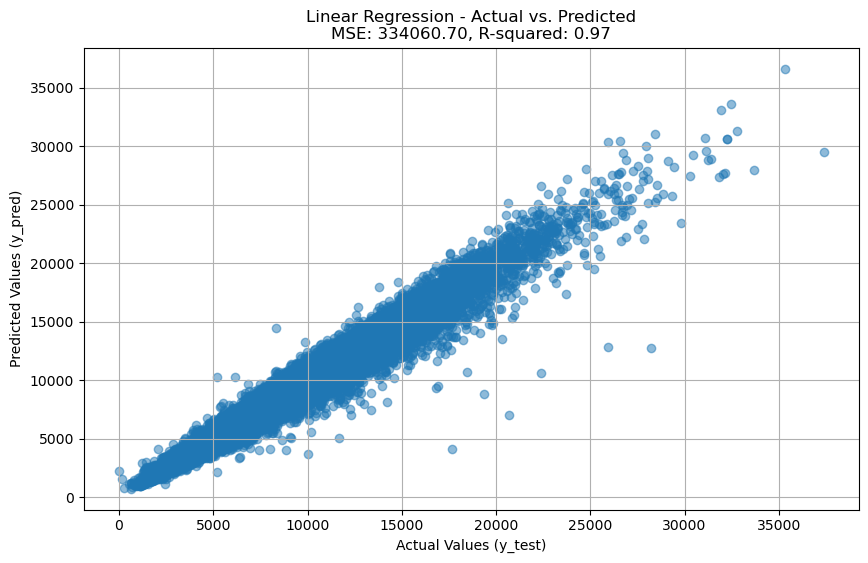

In [34]:
# Linear regression model
from sklearn.linear_model import LinearRegression
from sklearn import linear_model


# Create a linear regression model
model = LinearRegression()

# Fit the model on training data
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluation metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# R-squared (Coefficient of Determination)
r_squared = r2_score(y_test, y_pred)
print(f"R-squared (R2): {r_squared}")

# Create a scatter plot of actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values (y_pred)")
plt.title(f"Linear Regression - Actual vs. Predicted\nMSE: {mse:.2f}, R-squared: {r_squared:.2f}")
plt.grid(True)
plt.show()

After implementing improved feature engineering, there is a noticeable enhancement in the metrics. The new root mean square error (RMSE) is 577.98 compared to the previous RMSE of 1590.64. Consequently, I will employ this encoding for the final model.


## Final Model : Catboost for each store_id

In [35]:
# Initialize a dictionary to store results and lists to store overall predictions and actuals
model_results = {}
all_y_test = []
all_y_pred = []

# Loop through each store_id in the list
for store_id in range(1, 1116):
    # Filter the data for the specific store
    store_data = encode[encode['store_id'] == store_id]

    # Prepare features and target
    features = store_data.drop(['sales', 'date'], axis=1)
    target = store_data['sales']

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

    # Initialize the CatBoostRegressor model
    model = CatBoostRegressor(eval_metric='RMSE', iterations=250, learning_rate=0.5, depth=6, loss_function='RMSE', thread_count=-1, verbose=False)

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Append predictions and actuals for overall metrics calculation
    all_y_test.extend(y_test)
    all_y_pred.extend(y_pred)

    # Calculate metrics for the current store
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r_squared = r2_score(y_test, y_pred)

    # Store the results for this store
    model_results[store_id] = {'RMSE': rmse, 'R_squared': r_squared}

# Calculate overall metrics
overall_rmse = np.sqrt(mean_squared_error(all_y_test, all_y_pred))
overall_r2 = r2_score(all_y_test, all_y_pred)

# Print the results for each store and overall metrics
for store_id, metrics in model_results.items():
    print(f"Store {store_id} - RMSE: {metrics['RMSE']}, R_squared: {metrics['R_squared']}")

print(f'Overall RMSE: {overall_rmse}')
print(f'Overall R2: {overall_r2}')


Store 1 - RMSE: 357.65885350509734, R_squared: 0.8778869685278623
Store 2 - RMSE: 377.87570983449854, R_squared: 0.9452209137765469
Store 3 - RMSE: 425.4917104685706, R_squared: 0.9649728030298622
Store 4 - RMSE: 403.5579909415712, R_squared: 0.9413441610289278
Store 5 - RMSE: 308.6958109680913, R_squared: 0.9581996477350945
Store 6 - RMSE: 274.601054155122, R_squared: 0.9688307137700839
Store 7 - RMSE: 602.9959499463348, R_squared: 0.9396310038258154
Store 8 - RMSE: 398.9270320821782, R_squared: 0.9597243795854155
Store 9 - RMSE: 339.37257999896053, R_squared: 0.9512346616603791
Store 10 - RMSE: 314.25942150894565, R_squared: 0.8896806384054645
Store 11 - RMSE: 498.0421794381304, R_squared: 0.9578683475926006
Store 12 - RMSE: 489.6093824939067, R_squared: 0.946501428168091
Store 13 - RMSE: 447.7369560309764, R_squared: 0.911611609271565
Store 14 - RMSE: 443.76519415454584, R_squared: 0.9138435866133335
Store 15 - RMSE: 515.2238848871871, R_squared: 0.923567854022639
Store 16 - RMSE: 4

In [36]:
# K-fold cross-validation
from sklearn.model_selection import KFold

# Initialize a dictionary to store results and lists for overall metrics
model_results = {}
all_fold_rmse = []
all_fold_r2 = []

# Number of folds for cross-validation
n_splits = 5

# Initialize KFold
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Loop through each store_id in the list
for store_id in range(1, 1116):
    # Filter the data for the specific store
    store_data = encode[encode['store_id'] == store_id]

    # Prepare features and target
    features = store_data.drop(['sales', 'date'], axis=1)
    target = store_data['sales']

    # Initialize lists to store metrics for each fold
    fold_rmse = []
    fold_r2 = []

    # Perform cross-validation
    for train_index, test_index in kf.split(features):
        X_train, X_test = features.iloc[train_index], features.iloc[test_index]
        y_train, y_test = target.iloc[train_index], target.iloc[test_index]

        # Initialize the CatBoostRegressor model
        model = CatBoostRegressor(eval_metric='RMSE', iterations=250, learning_rate=0.5, depth=6, loss_function='RMSE', verbose=False)

        # Train the model
        model.fit(X_train, y_train)

        # Make predictions on the test set
        y_pred = model.predict(X_test)

        # Calculate metrics for the current fold
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        r_squared = r2_score(y_test, y_pred)

        fold_rmse.append(rmse)
        fold_r2.append(r_squared)

    # Store the average results for this store
    model_results[store_id] = {'RMSE': np.mean(fold_rmse), 'R_squared': np.mean(fold_r2)}
    # Aggregate results for overall metrics
    all_fold_rmse.extend(fold_rmse)
    all_fold_r2.extend(fold_r2)

# Calculate overall metrics
overall_rmse = np.mean(all_fold_rmse)
overall_r2 = np.mean(all_fold_r2)

# Display overall metrics
print(f'Overall RMSE: {overall_rmse}') 
print(f'Overall R2: {overall_r2}')


Overall RMSE: 482.80015343260135
Overall R2: 0.9182639953302831


In [37]:
# Train with the FULL data

all_model_predictions = {}  # To store predictions for all stores

# Loop through each store_id in the list to train models and make predictions on future_encode
for store_id in range(1, 1116):
    # Filter the training data for the specific store
    store_data = encode[encode['store_id'] == store_id]

    # Prepare features and target for the entire dataset
    features = store_data.drop(['sales', 'date'], axis=1)
    target = store_data['sales']

    # Initialize and train the CatBoostRegressor model on the entire dataset for that store
    model = CatBoostRegressor(iterations=250, learning_rate=0.5, depth=6, loss_function='RMSE', verbose=False)
    model.fit(features, target)

    # Filter future_encode for the specific store to make predictions
    future_data_for_store = future_encode[future_encode['store_id'] == store_id]
    future_features = future_data_for_store.drop(['date'], axis=1)  # Assuming 'sales' and 'date' need to be dropped

    # Make predictions on the future data for this store
    predictions = model.predict(future_features)

    # Store predictions for each store
    all_model_predictions[store_id] = predictions

# At this point, `all_model_predictions` holds the predictions for each store based on `future_encode`


In [38]:
# Store predictions in a new dataset

predictions_df = future_encode[['store_id', 'date']].copy()
predictions_df['predicted_sales'] = np.nan  # Initialize the column for predictions

# Iterate over the all_model_predictions to update predictions_df with the predicted values
for store_id, predictions in all_model_predictions.items():
    # Find the indexes in future_encode that match the current store_id
    indexes = future_encode[future_encode['store_id'] == store_id].index
    
    # Assign the predictions to these indexes in predictions_df
    predictions_df.loc[indexes, 'predicted_sales'] = predictions

print(predictions_df.head())


   store_id       date  predicted_sales
0       761 2015-04-22      7399.207032
1       238 2015-04-22      6187.362076
2       198 2015-04-22      1656.852732
3       606 2015-04-22      5343.516912
4       382 2015-04-22      6287.845579


In [39]:
# Re-read the future data in order to retrieve index
df_future = pd.read_excel('/Users/leozinho.air/Desktop/Ironhack/Project 03 - Iron Kaggle/Future_data_without_label.xlsx')
standard_head(df_future)

,index,store_id,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday
0,617699,761,3,2015-04-22,955,1,0,0,0
1,522235,238,3,2015-04-22,1025,1,0,0,0
2,321177,198,3,2015-04-22,203,1,0,0,0
3,395430,606,3,2015-04-22,585,1,0,0,0
4,488260,382,3,2015-04-22,555,1,0,0,0
...,...,...,...,...,...,...,...,...,...
70281,369531,58,5,2015-07-31,603,1,1,0,0
70282,161452,241,5,2015-07-31,763,1,1,0,1
70283,242869,293,5,2015-07-31,878,1,1,0,1
70284,480480,14,5,2015-07-31,710,1,1,0,1


In [40]:
# Merge df_future with df_predictions in order to retrieve the index
merged_df = pd.merge(df_future, predictions_df[['store_id', 'date', 'predicted_sales']], on=['store_id', 'date'], how='left')

# Set predictions to 0 where there are no connections
merged_df['predicted_sales'].fillna(0, inplace=True)

# Now merged_df contains both the original

In [41]:
# Selecting the columns i need
predictions = merged_df[['index','predicted_sales']]
predictions

,index,predicted_sales
0,617699,7399.207032
1,522235,6187.362076
2,321177,1656.852732
3,395430,5343.516912
4,488260,6287.845579
...,...,...
70281,369531,9016.541411
70282,161452,7834.705628
70283,242869,7108.040472
70284,480480,6701.307155


In [42]:
# Export to excel
file_path = '/Users/leozinho.air/Desktop/Ironhack/Project 03 - Iron Kaggle/predictions_4.xlsx'

predictions.to_excel(file_path, index=False)